In [21]:
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk(r'C:\Users\dell pc\Desktop\pothole-detection-dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))
imagepaths

681


['C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\1.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\10.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\100.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\101.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\102.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\103.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\104.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\105.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\106.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\107.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\108.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\109.jpg',
 'C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\11.jpg',
 'C:\\Users\\del

In [38]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('C:\\Users\\dell pc\\Desktop\\pothole-detection-dataset\\normal\\')):
            y.append('normal')
        else:
            y.append('potholes')
    except:
        pass
    
len(y)

680

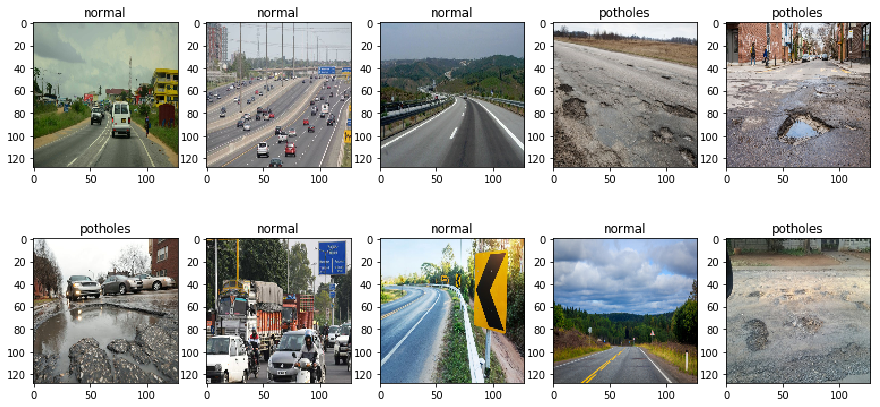

In [25]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')
        

In [26]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [27]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 128)       147584    
__________

In [29]:
model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))


Instructions for updating:
Use tf.cast instead.
Train on 544 samples, validate on 136 samples
Epoch 1/30
 - 36s - loss: 8.4020 - acc: 0.4761 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/30
 - 35s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/30
 - 35s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/30
 - 33s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/30
 - 33s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/30
 - 33s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/30
 - 35s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/30
 - 35s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/30
 - 35s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/30
 - 34s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 11/30
 - 32s - loss: 8.3850 - acc: 0.4798 - val_loss: 8.059

In [30]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

136/136 [==============================] - 3s 22ms/step
Test accuracy: 50.00%


In [31]:
# Making predictions on test data
prediction = model.predict(x_test)


In [32]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [33]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        

In [34]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),columns=["Predicted NORMAL", "Predicted POTHOLES"],index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,0,68
Actual POTHOLES,0,68


Train on 612 samples, validate on 68 samples
Epoch 1/3
 - 39s - loss: 8.4618 - acc: 0.4739 - val_loss: 7.5850 - val_acc: 0.5294
Epoch 2/3
 - 39s - loss: 8.4014 - acc: 0.4788 - val_loss: 7.5850 - val_acc: 0.5294
Epoch 3/3
 - 40s - loss: 8.4014 - acc: 0.4788 - val_loss: 7.5850 - val_acc: 0.5294
68/68 [==============================] - 1s 20ms/step
Train on 544 samples, validate on 136 samples
Epoch 1/3
 - 37s - loss: 7.7430 - acc: 0.5165 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/3
 - 36s - loss: 7.7331 - acc: 0.5202 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/3
 - 36s - loss: 7.7331 - acc: 0.5202 - val_loss: 8.0590 - val_acc: 0.5000
136/136 [==============================] - 2s 18ms/step
Train on 476 samples, validate on 204 samples
Epoch 1/3
 - 33s - loss: 8.4420 - acc: 0.4748 - val_loss: 7.7430 - val_acc: 0.5196
Epoch 2/3
 - 33s - loss: 8.5670 - acc: 0.4685 - val_loss: 7.7430 - val_acc: 0.5196
Epoch 3/3
 - 34s - loss: 8.5670 - acc: 0.4685 - val_loss: 7.7430 - val_acc: 0.5196
204/20

Text(0,0.5,'accuracy')

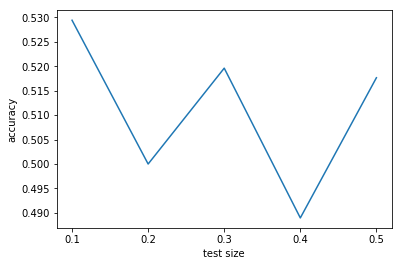

In [35]:
r2=[]
k=[0.1,0.2,0.3,0.4,0.5]

for i in k:
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i,random_state=5)
    model = Sequential()

    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=3, batch_size=12, verbose=2, 
             validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    r2.append(accuracy)
    
plt.plot(k,r2)
plt.xticks(k)
plt.xlabel("test size")
plt.ylabel("accuracy")

Train on 340 samples, validate on 340 samples
Epoch 1/3
 - 26s - loss: 8.8650 - acc: 0.4500 - val_loss: 7.7746 - val_acc: 0.5176
Epoch 2/3
 - 26s - loss: 8.8650 - acc: 0.4500 - val_loss: 7.7746 - val_acc: 0.5176
Epoch 3/3
 - 28s - loss: 8.8650 - acc: 0.4500 - val_loss: 7.7746 - val_acc: 0.5176


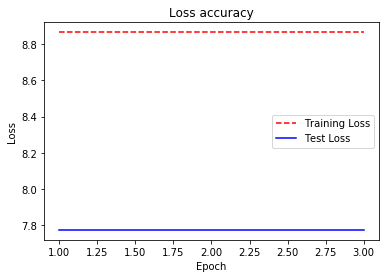

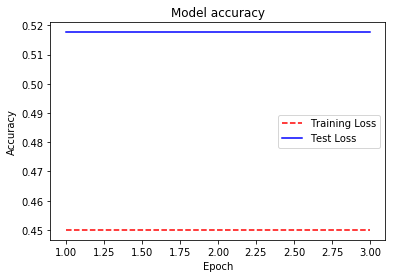

In [37]:
history =  model.fit(x_train, y_train, epochs=3, batch_size=12, verbose=2, 
             validation_data=(x_test, y_test))

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss accuracy')
plt.show()

training_acc = history.history['acc']
test_acc = history.history['val_acc']
epoch_count = range(1, len(training_acc) + 1)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'])
plt.show()